In [38]:
%load_ext autoreload
%autoreload 2

from cd_ann3 import *
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
gd = train_gd(0.8e-5, early_stopping=False)
rhc = train_rhc(learning_rate=0.45, restarts=10, early_stopping=False)
sa = train_sa(T=1, decay=0.8, early_stopping=False)
# ga = train_ga(pop_size=200, max_iters=2000, early_stopping=False)
ga = load('ga200.pkl')

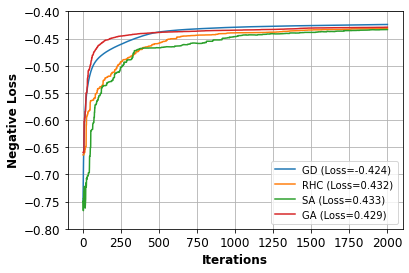

In [26]:
loss_gd = gd[0].fitness_curve[-1]
loss_ga = ga[0].fitness_curve[-1]
loss_rhc = rhc[0].fitness_curve[-1]
loss_sa = sa[0].fitness_curve[-1]

x = np.arange(1, len(sa[0].fitness_curve)+1)

plt.figure()
plt.plot(x, gd[0].fitness_curve, label='GD (Loss={:.3f})'.format(loss_gd))
plt.plot(x, -np.array(rhc[0].fitness_curve), label='RHC (Loss={:.3f})'.format(loss_rhc))
plt.plot(x, -sa[0].fitness_curve, label='SA (Loss={:.3f})'.format(loss_sa))
plt.plot(x, -ga[0].fitness_curve, label='GA (Loss={:.3f})'.format(loss_ga))
plt.ylim([-0.8, -0.4])
plt.grid()
plt.xlabel('Iterations', fontsize=12, fontweight='bold')
plt.ylabel('Negative Loss', fontsize=12, fontweight='bold')
plt.legend()


ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('nn-loss.pdf')
plt.show()
plt.close()

In [22]:
gd_t, gd_v = get_train_validation_curve(gd)
ga_t, ga_v = get_train_validation_curve(ga)
sa_t, sa_v = get_train_validation_curve(sa)
rhc_t, rhc_v = get_train_validation_curve(rhc)

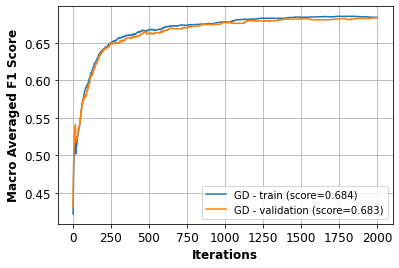

In [28]:
plt.figure()

plt.plot(x, gd_t, label='GD - train (score={:.3f})'.format(gd_t[-1]))
plt.plot(x, gd_v, label='GD - validation (score={:.3f})'.format(gd_v[-1]))

plt.legend()
plt.grid()
plt.xlabel('Iterations', fontsize=12, fontweight='bold')
plt.ylabel('Macro Averaged F1 Score', fontsize=12, fontweight='bold')

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('nn-gd-cv.pdf')
plt.show()
plt.close()

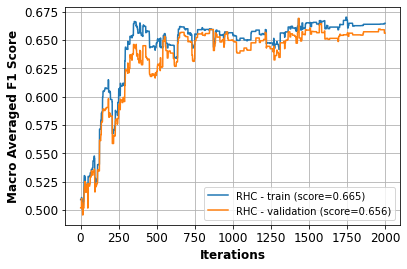

In [51]:
plt.figure()

plt.plot(x, rhc_t, label='RHC - train (score={:.3f})'.format(rhc_t[-1]))
plt.plot(x, rhc_v, label='RHC - validation (score={:.3f})'.format(rhc_v[-1]))

plt.legend()
plt.grid()
plt.xlabel('Iterations', fontsize=12, fontweight='bold')
plt.ylabel('Macro Averaged F1 Score', fontsize=12, fontweight='bold')

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('nn-rhc-cv.pdf')
plt.show()
plt.close()

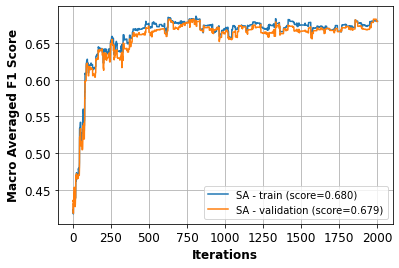

In [29]:
plt.figure()

plt.plot(x, sa_t, label='SA - train (score={:.3f})'.format(sa_t[-1]))
plt.plot(x, sa_v, label='SA - validation (score={:.3f})'.format(sa_v[-1]))

plt.legend()
plt.grid()
plt.xlabel('Iterations', fontsize=12, fontweight='bold')
plt.ylabel('Macro Averaged F1 Score', fontsize=12, fontweight='bold')

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('nn-sa-cv.pdf')
plt.show()
plt.close()

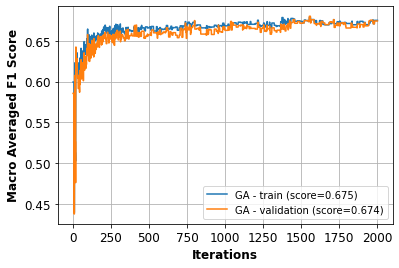

In [30]:
plt.figure()

plt.plot(x, ga_t, label='GA - train (score={:.3f})'.format(ga_t[-1]))
plt.plot(x, ga_v, label='GA - validation (score={:.3f})'.format(ga_v[-1]))

plt.legend()
plt.grid()
plt.xlabel('Iterations', fontsize=12, fontweight='bold')
plt.ylabel('Macro Averaged F1 Score', fontsize=12, fontweight='bold')

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.savefig('nn-ga-cv.pdf')
plt.show()
plt.close()

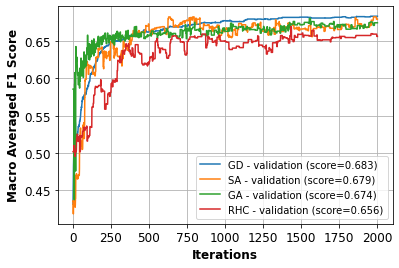

In [45]:
plt.figure()
# plt.plot(x, gd_t, label='GD - train (score={})')
plt.plot(x, gd_v, label='GD - validation (score={:.3f})'.format(gd_v[-1]))

# plt.plot(x, sa_t, label='SA - train')
plt.plot(x, sa_v, label='SA - validation (score={:.3f})'.format(sa_v[-1]))

#plt.plot(x, ga_t, label='GA - train (score={:.3f})'.format(ga_t[-1]))
plt.plot(x, ga_v, label='GA - validation (score={:.3f})'.format(ga_v[-1]))

# plt.plot(x, rhc_t, label='RHC - train')
plt.plot(x, rhc_v, label='RHC - validation (score={:.3f})'.format(rhc_v[-1]))


plt.legend()
plt.grid()
plt.xlabel('Iterations', fontsize=12, fontweight='bold')
plt.ylabel('Macro Averaged F1 Score', fontsize=12, fontweight='bold')

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


plt.savefig('nn-cv-comp.pdf')
plt.show()
plt.close()

# Test set performance

In [46]:
df = pd.DataFrame({'GD': [gd[1], gd[2], get_test_score(gd)],
                   'GA': [ga[1], ga[2], get_test_score(ga)],
                   'RHC': [rhc[1], rhc[2], get_test_score(rhc)],
                   'SA': [rhc[1], rhc[2], get_test_score(sa)],
}, index=['Train', 'Validation', 'Test'])
df.to_latex('nn-perf.tex')
df

,GD,GA,RHC,SA
Train,0.683994,0.675240,0.664904,0.664904
Validation,0.683171,0.674435,0.656168,0.656168
Test,0.663387,0.660286,0.636971,0.651011


In [39]:
t = time.time()
gd2 = train_gd(0.8e-5, early_stopping=True)
t_gd = time.time() - t


In [40]:
t = time.time()
ga2 = train_ga(pop_size=200, max_iters=2000, early_stopping=True)
t_ga = time.time() - t

In [41]:
t = time.time()
sa2 = train_sa(T=1, decay=0.8, early_stopping=True)
t_sa = time.time() - t


In [42]:

t = time.time()
rhc2 = train_rhc(learning_rate=0.45, restarts=10, early_stopping=True)
t_rhc = time.time() - t


In [49]:
df2 = pd.DataFrame({'GD': [t_gd, len(gd2[0].fitness_curve), gd2[0].eval_count],
                   'GA': [t_ga, len(ga2[0].fitness_curve), ga2[0].eval_count],
                   'RHC': [t_rhc, len(rhc2[0].fitness_curve), rhc2[0].eval_count],
                   'SA': [t_sa, len(sa2[0].fitness_curve), sa2[0].eval_count],
}, index=['Time (sec)', 'Iterations', 'Function Eval'])
df2

,GD,GA,RHC,SA
Time (sec),5.931296,356.199519,90.636503,12.491936
Iterations,581.000000,398.000000,1318.000000,2000.000000
Function Eval,1163.000000,80381.000000,19633.000000,2564.000000


In [50]:
df2.to_latex('nn-resource.tex')